In [39]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts


In [40]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

cityDF = pd.read_csv(city_data_to_load)
rideDF = pd.read_csv(ride_data_to_load)
rideDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [41]:
rideDF.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [42]:
cityDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [43]:
pyberDf = pd.merge(rideDF, cityDF, how="left", on=["city", "city"])
pyberDf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [44]:
# make dataframes for urban, suburban, and rural types
urbanDf = pyberDf[pyberDf["type"] == "Urban"]
suburbanDf = pyberDf[pyberDf["type"] == "Suburban"]
ruralDf = pyberDf[pyberDf["type"] == "Rural"]


In [45]:
# make ride count variable for urban, suburban, and rural types
urbanRideCount = urbanDf.groupby(["city"]).count()["ride_id"]
suburbanRideCount = suburbanDf.groupby(["city"]).count()["ride_id"]
ruralRideCount = ruralDf.groupby(["city"]).count()["ride_id"]


In [46]:
# make average fare variable for urban, suburban, and rural types
urbanAvgFare = urbanDf.groupby(["city"]).mean()["fare"]
suburbanAvgFare = suburbanDf.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralDf.groupby(["city"]).mean()["fare"]


In [47]:
# make driver count variable for urban, suburban, and rural types
urbanDriverCount = urbanDf.groupby(["city"]).mean()["driver_count"]
suburbanDriverCount = suburbanDf.groupby(["city"]).mean()["driver_count"]
ruralDriverCount = ruralDf.groupby(["city"]).mean()["driver_count"]


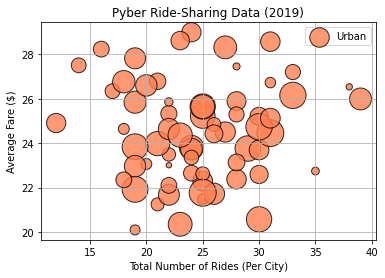

In [48]:
plt.scatter(urbanRideCount, urbanAvgFare, s=urbanDriverCount*10, c="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


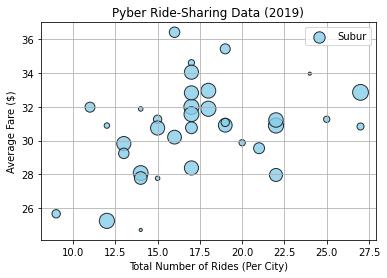

In [49]:
plt.scatter(suburbanRideCount, suburbanAvgFare, s=suburbanDriverCount*10,
            c="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Subur")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


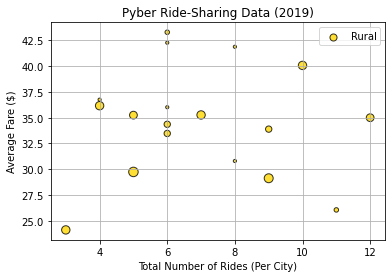

In [50]:
plt.scatter(ruralRideCount, ruralAvgFare, s=ruralDriverCount*10,
            c="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


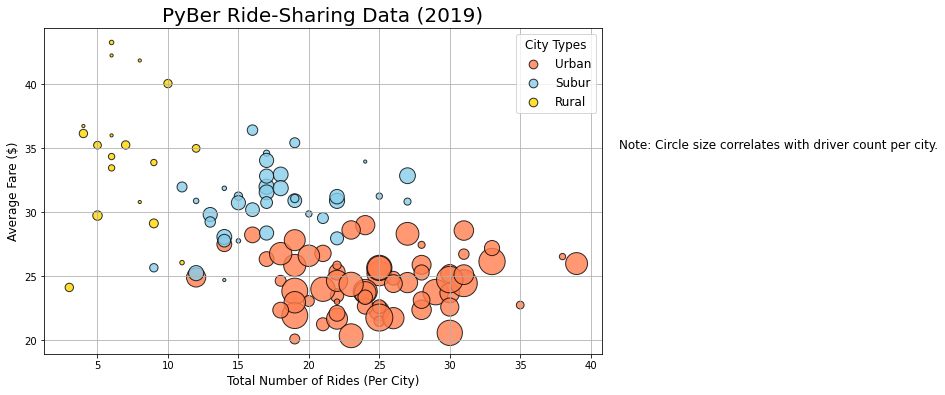

In [51]:
# Build scatter plots for data
plt.subplots(figsize=(10, 6))
plt.scatter(urbanRideCount, urbanAvgFare, s=urbanDriverCount*10,
            c="coral", edgecolor="black", linewidths=1, alpha=.8, label="Urban")

plt.scatter(suburbanRideCount, suburbanAvgFare, s=suburbanDriverCount*10,
            c="skyblue", edgecolor="black", linewidths=1, alpha=.8, label="Subur")

plt.scatter(ruralRideCount, ruralAvgFare, s=ruralDriverCount*10,
            c="gold", edgecolor="black", linewidths=1, alpha=.8, label="Rural")

#Incorporate other graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("Analysis/Fig1.jpeg")
# Show the plot
plt.show()


In [52]:
urbanDf.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [53]:
round(urbanRideCount.mean(), 2), round(suburbanRideCount.mean(), 2), round(ruralRideCount.mean(), 2)


(24.62, 17.36, 6.94)

In [54]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urbanRideCount)
print(
    f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urbanRideCount)
print(
    f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urbanRideCount)
print(
    f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [55]:
# Get the fares for the urban cities.
urban_fares = urbanDf["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [56]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [57]:
# Get the driver count data from the urban cities.
urban_drivers = urbanDf['driver_count']
urban_drivers.head()


0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

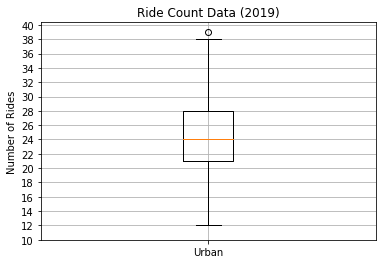

In [58]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urbanRideCount, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


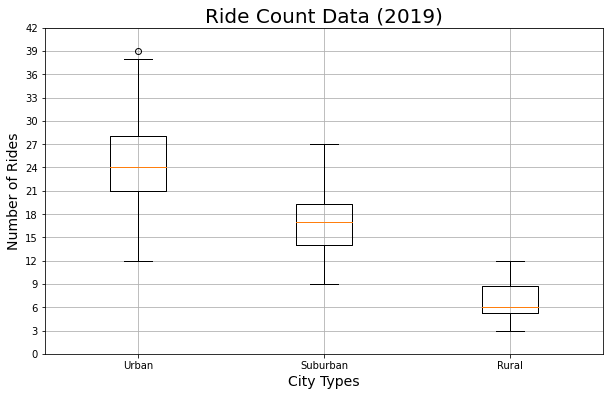

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urbanRideCount, suburbanRideCount, ruralRideCount]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.jpeg")
plt.show()


In [60]:
# Get the city that matches 39.
urban_city_outlier = urbanRideCount[urbanRideCount == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


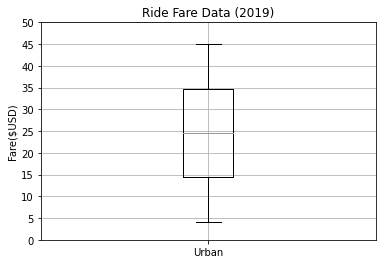

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


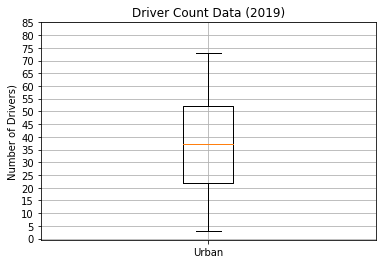

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [62]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


In [63]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyberDf.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:
# Get the sum of all the fares.
total_fares = pyberDf["fare"].sum()
total_fares


63538.64

In [65]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [66]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * \
    pyberDf.groupby(["type"]).sum()["fare"] / pyberDf["fare"].sum()
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

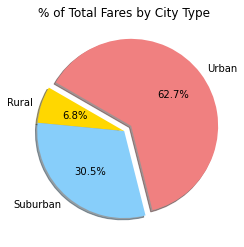

In [67]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()


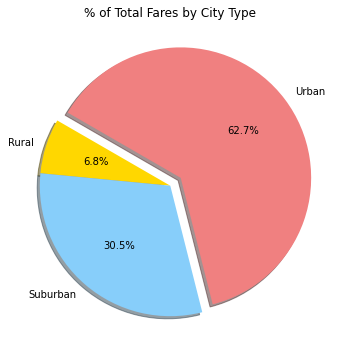

In [68]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.jpeg")
# Show Figure
plt.show()


In [69]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * \
    pyberDf.groupby(["type"]).count()["ride_id"] / \
    pyberDf["ride_id"].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

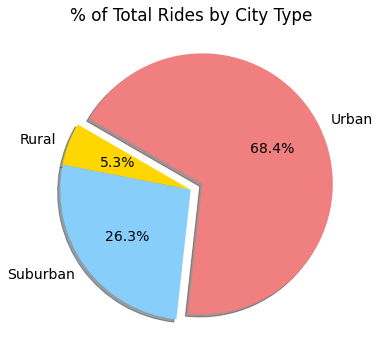

In [70]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()


In [72]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * cityDF.groupby(["type"]).sum()["driver_count"] / cityDF["driver_count"].sum()
driver_percents


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

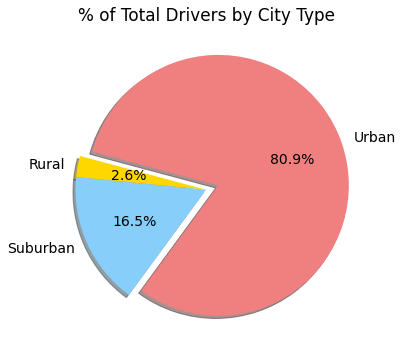

In [73]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()
